# Solving f(x) = 0 using linearization (Newton's Method)

In order to understand the solver for $\frac{1}{\sqrt{x}}$ we have to apply the following theory:
  * Gradients of a 1D function
  * Linearization using the gradient
  * Netwton's Method to solve $f(x) = 0$
  * Put everything together in code


In order to simplify the methods we use the following function first:
$f(x) = x^2$

The gradient of a function $f: R^n \rightarrow R^1$ is its derivative. It tells you the steepness (positive up, negative down) of a function at a certain point.

In our case the gradient has a closed form solution:
$f'(x) = 2x$


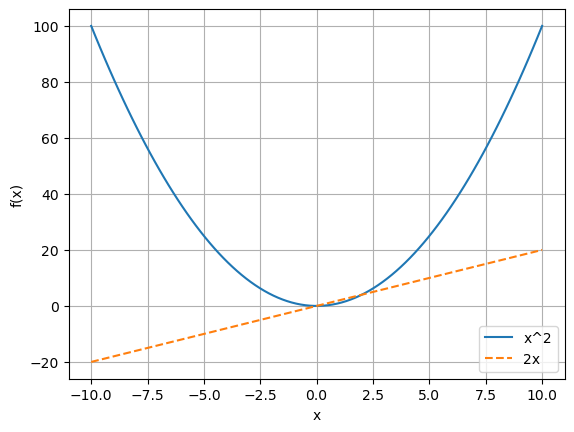

In [150]:
import matplotlib.pyplot as plt
import numpy as np

RESOLUTION = 100

x = np.linspace(-10, 10, RESOLUTION)
f_x = lambda x: x**2
f_x_prim = lambda x: 2*x


plt.plot(x, f_x(x), label='x^2')
plt.plot(x, f_x_prim(x), '--', label='2x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

We observe the following:
* Left of the x=0 the gradient turns negative
* The more we move away from the center (x=0), the steeper the function gets.

### Linearizing a function
The Idea of linearizing is that any function can be approximated using a starting point $f(x_0)$ and its gradient at $x_0$, $f'(x_0)$. At least in the region around the point $x_0$:
$$
g(x) = f(x_0) + f'(x_0)*(x-x_0) \approx f(x)
$$

Lets plot this for our quadratic function around the point $x_0 = 5$:

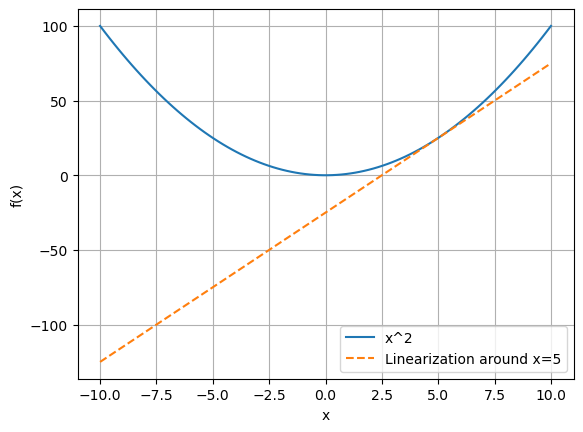

In [151]:
g_x_approx5 = lambda x: f_x(5) + f_x_prim(5)*(x-5) # linearization around point 5

plt.figure()
plt.plot(x, f_x(x), label='x^2')
plt.plot(x, g_x_approx5(x), '--', label='Linearization around x=5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

We observe the following:
  * The new function is linear. This is a class of functions which is easier to work with.
  * The new function only uses one two evaluation of the original function ($f(5)$ and $f'(5)$). This cloud stem from an arbitrary or unknown function.
  * The new function is quite a good approximation in the range ($x \in [4,6]$) and quite bad later on

Conclusion:
Without knowing much of the original function (just prob it two times), we obtain an approximation that is good enough in some neighborhood.

### Netwon's Method
Newton's method is an iterative algorithm to solve the equation $f(x) = 0$.

The idea is to start with a random guess $x_0$ and update this guess by solving the linearized version of the function itself:

Sovle $g(x)=0$ (instead of $f(x)=0$ directly):
$$
g(x) = 0 \\
f(x_0) + f'(x_0)*(x-x_0) = 0 \\
x = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

At the new $x$, the linearization $g(x)$ becomes 0. But as the linearization is only an approximation, the result is not yet perfect.
Therefore we use $x$ as new starting point for our linearization and repeat the process.

Let's take a random start position e.g. $x_0 = 8.3$ and compute one newton step for $g_{8.3}(x) = 0$:

$$
x_1 = 8.3 + \frac{f(8.3)}{f'(8.3)} = 8.3 - \frac{8.3*8.3}{2*8.3} = 4.1
$$

Then we initialize our approximation $g$ around the point $4.1$.

And repat the process:
$$
x_1 = 4.1 + \frac{f(4.1)}{f'(4.1)} = 4.1 - \frac{4.1*4.1}{2*4.1} = 2.0
$$


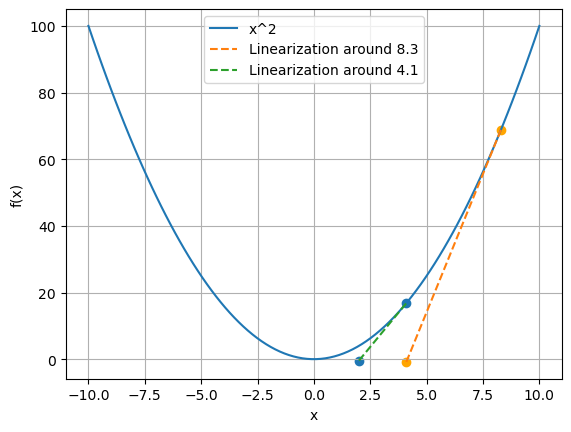

In [152]:
t_83 = np.linspace(4.1, 8.3, 10)
t_41 = np.linspace(2.0, 4.1, 10)
g_x_approx83 = lambda x: f_x(8.3) + f_x_prim(8.3)*(x-8.3) # linearization around point 8.3
g_x_approx41 = lambda x: f_x(4.1) + f_x_prim(4.1)*(x-4.1) # linearization around point 4.1


plt.figure()
plt.plot(x, f_x(x), label='x^2')
plt.plot(t_83, g_x_approx83(t_83), '--', label='Linearization around 8.3')
plt.scatter([8.3, 4.1], g_x_approx83(np.array([8.3, 4.1])), c='orange')
plt.plot(t_41, g_x_approx41(t_41), '--', label='Linearization around 4.1')
plt.scatter([4.1, 2.0], g_x_approx41(np.array([4.1, 2.0])))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

We observe:
  * After two steps, the approximation is not yet perfect, but we are improving.
  * If our random starting position 8.3, is -8.3, the gradient would have switched sign, and the process would work as intentioned.
  * We do not have to know much about our original function, just evaluating it at two points and evaluating its gradient is enough!

### Put it together
Obviously, finding the point where $x^2 = 0$ is a trivial problem. But now we can clean up and add some math tricks.

#### Let's compute $\sqrt{3}$:
Computing the square root of 3 is the same as solving: $x^2 = 3$.

Now, all we have to do is apply newton on $f(x): x^2 - 3 = 0$:

$$
f(x) = x^2-3 \\
f'(x) = 2x
$$

Update step:
$$
x = x_0 - \frac{x_0^2-3}{2*x_0}
$$

In [153]:
update_step = lambda x: x - (x**2-3)/(2*x)

x = 5 # initialize with a random value x=5:
print(f'Iteration #0: x={x:.3f} -- x^2={x**2:.3f}')
for i in range(4):
    x = update_step(x)
    print(f'Iteration #{i+1}: x={x:.3f} -- x^2={x**2:.3f}')
print(f'sqrt(3) = {x:.3f}')

Iteration #0: x=5.000 -- x^2=25.000
Iteration #1: x=2.800 -- x^2=7.840
Iteration #2: x=1.936 -- x^2=3.747
Iteration #3: x=1.743 -- x^2=3.037
Iteration #4: x=1.732 -- x^2=3.000
sqrt(3) = 1.732


### Solving $\frac{1}{\sqrt{x}}$

In the previous exercise we had x as an variable (we want to adjust) and y was the consant we want to compute the value from.

$$
\sqrt{3} = 1.732 \\
\sqrt{y} = x \\
y = x^2\\
f(x): x^2 - y = 0
$$

So we do the same for our original function (to have the same terminology we swap x with y):
$$
\frac{1}{\sqrt{y}} = x \\
f(x): \frac{1}{x^2}-y = 0 \\
f'(x): -\frac{2}{x^3}
$$

Then we put it together for the update step:
$$
x = x_0 - \frac{\frac{1}{x^2}-y}{-\frac{2}{x^3}} = \frac{1}{2}x_0 (3-y*x_0^2)
$$

and we can create the update function:



In [154]:
# example to compute 1/sqrt(2):

y = 2 # This is the value we want to compute

update_step = lambda x: 0.5*x*(3-y*x*x)
error = lambda x: (1/x**2) - y # should approach 0

x = 0.5 # Initialization matters
print(f'Iteration #0: x={x:.3f} -- error: {error(x):.3f}')
for i in range(5):
    x = update_step(x)
    print(f'Iteration #{i+1}: x={x:.3f} -- error: {error(x):.3f}')
print(f'1/sqrt(2) = {x:.3f}')

Iteration #0: x=0.500 -- error: 2.000
Iteration #1: x=0.625 -- error: 0.560
Iteration #2: x=0.693 -- error: 0.080
Iteration #3: x=0.707 -- error: 0.002
Iteration #4: x=0.707 -- error: 0.000
Iteration #5: x=0.707 -- error: 0.000
1/sqrt(2) = 0.707


### Verify our result

Lets verify if the point $1/\sqrt{2} = 0.7 $ is actually part of the function $1/\sqrt{x}$.
To do so, we plot the original function and verify if the point $(2, 0.707)$ is a part of.

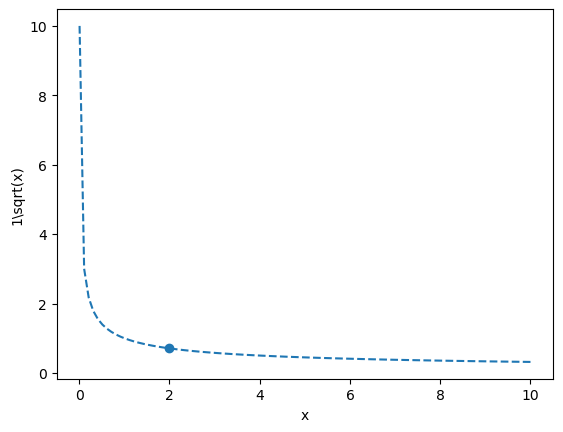

In [155]:
import matplotlib.pyplot as plt
import numpy as np

RESOLUTION = 100

x = np.linspace(0+1/RESOLUTION, 10, RESOLUTION) # do not divide by 0..
f_x = 1/np.sqrt(x) # in reality we do not have access to this function

plt.plot(x, f_x, '--')
plt.scatter([2.0], [0.707])
plt.xlabel('x')
plt.ylabel('1\sqrt(x)')
plt.show()

### Conclusion
Our point lies on the plot verifying that our computed result is correct.

In the process we computed the function $\frac{1}{\sqrt{x}}$ only using addition and multiplication.


### Range and Initialization

If we want to approximate the function at larger values, the result will become smaller. As the linearization is better if it is closer to the correct value, it is crucial to start with a "good" value for $x_0$. What is a good value, depends on the underlying function.
Therefore the fast inverse square root algorithm initializes x_0 with `0x5f3759df - ( i >> 1 )`, Just a fancy heuristic to start with.

The rest should follow the same math.

